# Do the types of crimes committed in Chicago depend on location and time?

## Goals

In previous cases, we learned about hypothesis testing to study how statistically significant differences between a value and a sample mean were. However, this required us to work with numerical variables. In this case, you will learn how to use contingency tables to explore and design hypotheses about potential relationships between categorical features in your data. You will also learn how to conduct a chi-squared (pronounced "kai") test to formally test for dependencies between those features.

## Introduction

**Business Context.** The Chicago police department wants you to write a report about crime patterns in the city so that they can start implementing some strategies based on your findings. However, because deploying a new strategy is resource intensive, they want you to confirm that the patterns they have observed are not merely due to randomness.

**Business Problem.** The department wants you to determine: **"Are the crime patterns we have observed merely due to chance, or do they represent an actionable signal?"**

**Analytical Context.** In this case, we will learn how to perform hypothesis tests to find out if two categorical variables are independent of each other, or if there are relationships between them which are not due to chance.

The case is structured as follows: you will (1) set up the contingency table for crime type vs. location; (2) learn about the chi-square test and apply it to this pair of variables to ascertain statistical significance of the patterns observed by the police department; and (3) apply this test to a few other observed patterns.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
#import pingouin

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Colab/chicago_crime_data.csv',sep=',',dtype={'ID': object, 'beat_num': object})
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11192233,JB100016,12/31/17 23:58,046XX N ST LOUIS AVE,630,BURGLARY,ATTEMPT FORCIBLE ENTRY,APARTMENT,False,False,...,33.0,14,5,1152214.0,1930694.0,2017,05/04/2018 15:51,41.965694,-87.715726,"(41.965693651, -87.715726125)"
1,11196379,JB105867,12/31/17 23:50,024XX N LAKE SHORE DR NB,460,BATTERY,SIMPLE,MOVIE HOUSE/THEATER,False,False,...,43.0,7,08B,1175293.0,1916610.0,2017,05/04/2018 15:51,41.926559,-87.631294,"(41.926558908, -87.631294073)"
2,11192540,JB100551,12/31/17 23:48,001XX E SUPERIOR ST,890,THEFT,FROM BUILDING,HOTEL/MOTEL,False,False,...,42.0,8,6,1177508.0,1905401.0,2017,05/04/2018 15:51,41.895751,-87.623496,"(41.895750913, -87.623495923)"
3,11192239,JB100032,12/31/17 23:45,019XX S CANAL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,...,25.0,31,14,1173432.0,1891037.0,2017,05/04/2018 15:51,41.856427,-87.638893,"(41.856426716, -87.638892854)"
4,11192254,JB100003,12/31/17 23:45,115XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,True,...,34.0,53,04B,1178329.0,1828012.0,2017,05/04/2018 15:51,41.683369,-87.622830,"(41.683369303, -87.622829524)"


## Contingency tables

Our Chicago crime dataset consists of records of individual incidents. For any given variable (e.g. `Primary Type`), each incident has a particular value. As an example, the first incident in the dataset is a burglary case (`Primary Type`) and it happened in an apartment (`Location Description`):

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>ID</th>      <th>Case Number</th>      <th>Date</th>      <th>Block</th>      <th>IUCR</th>      <th>Primary Type</th>      <th>Description</th>      <th>Location Description</th>      <th>Arrest</th>      <th>Domestic</th>      <th>beat_num</th>      <th>District</th>      <th>Ward</th>      <th>Community Area</th>      <th>FBI Code</th>      <th>X Coordinate</th>      <th>Y Coordinate</th>      <th>Year</th>      <th>Updated On</th>      <th>Latitude</th>      <th>Longitude</th>      <th>Location</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>11192233</td>      <td>JB100016</td>      <td>12/31/17 23:58</td>      <td>046XX N ST LOUIS AVE</td>      <td>630</td>      <td>BURGLARY</td>      <td>ATTEMPT FORCIBLE ENTRY</td>      <td>APARTMENT</td>      <td>False</td>      <td>False</td>      <td>1723</td>      <td>17.0</td>      <td>33.0</td>      <td>14</td>      <td>5</td>      <td>1152214.0</td>      <td>1930694.0</td>      <td>2017</td>      <td>5/4/18 15:51</td>      <td>41.965694</td>      <td>-87.715726</td>      <td>(41.965693651, -87.715726125)</td>    </tr>    <tr>      <th>1</th>      <td>11196379</td>      <td>JB105867</td>      <td>12/31/17 23:50</td>      <td>024XX N LAKE SHORE DR NB</td>      <td>460</td>      <td>BATTERY</td>      <td>SIMPLE</td>      <td>MOVIE HOUSE/THEATER</td>      <td>False</td>      <td>False</td>      <td>1935</td>      <td>19.0</td>      <td>43.0</td>      <td>7</td>      <td>08B</td>      <td>1175293.0</td>      <td>1916610.0</td>      <td>2017</td>      <td>5/4/18 15:51</td>      <td>41.926559</td>      <td>-87.631294</td>      <td>(41.926558908, -87.631294073)</td>    </tr>    <tr>      <th>2</th>      <td>11192540</td>      <td>JB100551</td>      <td>12/31/17 23:48</td>      <td>001XX E SUPERIOR ST</td>      <td>890</td>      <td>THEFT</td>      <td>FROM BUILDING</td>      <td>HOTEL/MOTEL</td>      <td>False</td>      <td>False</td>      <td>1833</td>      <td>18.0</td>      <td>42.0</td>      <td>8</td>      <td>6</td>      <td>1177508.0</td>      <td>1905401.0</td>      <td>2017</td>      <td>5/4/18 15:51</td>      <td>41.895751</td>      <td>-87.623496</td>      <td>(41.895750913, -87.623495923)</td>    </tr>    <tr>      <th>3</th>      <td>11192239</td>      <td>JB100032</td>      <td>12/31/17 23:45</td>      <td>019XX S CANAL ST</td>      <td>1320</td>      <td>CRIMINAL DAMAGE</td>      <td>TO VEHICLE</td>      <td>STREET</td>      <td>False</td>      <td>True</td>      <td>1235</td>      <td>12.0</td>      <td>25.0</td>      <td>31</td>      <td>14</td>      <td>1173432.0</td>      <td>1891037.0</td>      <td>2017</td>      <td>5/4/18 15:51</td>      <td>41.856427</td>      <td>-87.638893</td>      <td>(41.856426716, -87.638892854)</td>    </tr>    <tr>      <th>4</th>      <td>11192254</td>      <td>JB100003</td>      <td>12/31/17 23:45</td>      <td>115XX S STATE ST</td>      <td>041A</td>      <td>BATTERY</td>      <td>AGGRAVATED: HANDGUN</td>      <td>RESIDENCE</td>      <td>False</td>      <td>True</td>      <td>522</td>      <td>5.0</td>      <td>34.0</td>      <td>53</td>      <td>04B</td>      <td>1178329.0</td>      <td>1828012.0</td>      <td>2017</td>      <td>5/4/18 15:51</td>      <td>41.683369</td>      <td>-87.622830</td>      <td>(41.683369303, -87.622829524)</td>    </tr>  </tbody></table>

The police believe that `Primary Type` and `Location Description` are very related. We've seen in previous cases how we can use `corr()` to investigate relationships between numerical variables, but `Primary Type` and `Location Description` are categorical variables. How do we proceed?

Enter **contingency tables**. Just as frequency tables tell you the number of elements that fall into a single category, contingency tables give you the number of elements that fall into a *combination* of categories. In a sense, contingency tables are like the 2-dimensional extension of frequency tables (there are contingency tables that summarize more than 2 variables, but most of the time you will be dealing with 2-dimensional ones). For instance, the following table gives the full contingency table for `Primary Type` vs. `Location`:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th>Location Description</th>      <th>ABANDONED BUILDING</th>      <th>AIRCRAFT</th>      <th>AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA</th>      <th>AIRPORT BUILDING NON-TERMINAL - SECURE AREA</th>      <th>AIRPORT EXTERIOR - NON-SECURE AREA</th>      <th>AIRPORT EXTERIOR - SECURE AREA</th>      <th>AIRPORT PARKING LOT</th>      <th>AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA</th>      <th>AIRPORT TERMINAL LOWER LEVEL - SECURE AREA</th>      <th>AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA</th>      <th>AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA</th>      <th>AIRPORT TERMINAL UPPER LEVEL - SECURE AREA</th>      <th>AIRPORT TRANSPORTATION SYSTEM (ATS)</th>      <th>AIRPORT VENDING ESTABLISHMENT</th>      <th>AIRPORT/AIRCRAFT</th>      <th>ALLEY</th>      <th>ANIMAL HOSPITAL</th>      <th>APARTMENT</th>      <th>APPLIANCE STORE</th>      <th>ATHLETIC CLUB</th>      <th>ATM (AUTOMATIC TELLER MACHINE)</th>      <th>AUTO</th>      <th>AUTO / BOAT / RV DEALERSHIP</th>      <th>BANK</th>      <th>BAR OR TAVERN</th>      <th>BARBERSHOP</th>      <th>BASEMENT</th>      <th>BOAT/WATERCRAFT</th>      <th>BOWLING ALLEY</th>      <th>BRIDGE</th>      <th>CAR WASH</th>      <th>CEMETARY</th>      <th>CHA APARTMENT</th>      <th>CHA HALLWAY</th>      <th>CHA HALLWAY/STAIRWELL/ELEVATOR</th>      <th>CHA PARKING LOT</th>      <th>CHA PARKING LOT/GROUNDS</th>      <th>CHURCH</th>      <th>CHURCH/SYNAGOGUE/PLACE OF WORSHIP</th>      <th>CLEANING STORE</th>      <th>CLUB</th>      <th>COIN OPERATED MACHINE</th>      <th>COLLEGE/UNIVERSITY GROUNDS</th>      <th>COLLEGE/UNIVERSITY RESIDENCE HALL</th>      <th>COMMERCIAL / BUSINESS OFFICE</th>      <th>CONSTRUCTION SITE</th>      <th>CONVENIENCE STORE</th>      <th>CREDIT UNION</th>      <th>CTA "L" PLATFORM</th>      <th>CTA BUS</th>      <th>CTA BUS STOP</th>      <th>CTA GARAGE / OTHER PROPERTY</th>      <th>CTA PLATFORM</th>      <th>CTA PROPERTY</th>      <th>CTA STATION</th>      <th>CTA TRACKS - RIGHT OF WAY</th>      <th>CTA TRAIN</th>      <th>CURRENCY EXCHANGE</th>      <th>DAY CARE CENTER</th>      <th>DEPARTMENT STORE</th>      <th>DRIVEWAY</th>      <th>DRIVEWAY - RESIDENTIAL</th>      <th>DRUG STORE</th>      <th>FACTORY/MANUFACTURING BUILDING</th>      <th>FEDERAL BUILDING</th>      <th>FIRE STATION</th>      <th>FOREST PRESERVE</th>      <th>GANGWAY</th>      <th>GARAGE</th>      <th>GAS STATION</th>      <th>GAS STATION DRIVE/PROP.</th>      <th>GOVERNMENT BUILDING/PROPERTY</th>      <th>GROCERY FOOD STORE</th>      <th>HALLWAY</th>      <th>HIGHWAY/EXPRESSWAY</th>      <th>HOSPITAL BUILDING/GROUNDS</th>      <th>HOTEL/MOTEL</th>      <th>HOUSE</th>      <th>JAIL / LOCK-UP FACILITY</th>      <th>LAKEFRONT/WATERFRONT/RIVERBANK</th>      <th>LIBRARY</th>      <th>MEDICAL/DENTAL OFFICE</th>      <th>MOVIE HOUSE/THEATER</th>      <th>NEWSSTAND</th>      <th>NURSING HOME</th>      <th>NURSING HOME/RETIREMENT HOME</th>      <th>OTHER</th>      <th>OTHER COMMERCIAL TRANSPORTATION</th>      <th>OTHER RAILROAD PROP / TRAIN DEPOT</th>      <th>PARK PROPERTY</th>      <th>PARKING LOT</th>      <th>PARKING LOT/GARAGE(NON.RESID.)</th>      <th>PAWN SHOP</th>      <th>POLICE FACILITY/VEH PARKING LOT</th>      <th>POOL ROOM</th>      <th>PORCH</th>      <th>RESIDENCE</th>      <th>RESIDENCE PORCH/HALLWAY</th>      <th>RESIDENCE-GARAGE</th>      <th>RESIDENTIAL YARD (FRONT/BACK)</th>      <th>RESTAURANT</th>      <th>RETAIL STORE</th>      <th>RIVER BANK</th>      <th>ROOMING HOUSE</th>      <th>SAVINGS AND LOAN</th>      <th>SCHOOL YARD</th>      <th>SCHOOL, PRIVATE, BUILDING</th>      <th>SCHOOL, PRIVATE, GROUNDS</th>      <th>SCHOOL, PUBLIC, BUILDING</th>      <th>SCHOOL, PUBLIC, GROUNDS</th>      <th>SIDEWALK</th>      <th>SMALL RETAIL STORE</th>      <th>SPORTS ARENA/STADIUM</th>      <th>STAIRWELL</th>      <th>STREET</th>      <th>TAVERN</th>      <th>TAVERN/LIQUOR STORE</th>      <th>TAXICAB</th>      <th>VACANT LOT</th>      <th>VACANT LOT/LAND</th>      <th>VEHICLE - DELIVERY TRUCK</th>      <th>VEHICLE - OTHER RIDE SERVICE</th>      <th>VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)</th>      <th>VEHICLE NON-COMMERCIAL</th>      <th>VEHICLE-COMMERCIAL</th>      <th>VESTIBULE</th>      <th>WAREHOUSE</th>      <th>YARD</th>    </tr>    <tr>      <th>Primary Type</th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>ARSON</th>      <td>10</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>31</td>      <td>0</td>      <td>36</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>3</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>2</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>12</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>7</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>75</td>      <td>12</td>      <td>42</td>      <td>12</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>1</td>      <td>1</td>      <td>4</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>56</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>7</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>100</td>      <td>2</td>      <td>0</td>      <td>1</td>      <td>0</td>    </tr>    <tr>      <th>ASSAULT</th>      <td>5</td>      <td>0</td>      <td>6</td>      <td>1</td>      <td>9</td>      <td>2</td>      <td>8</td>      <td>8</td>      <td>1</td>      <td>0</td>      <td>4</td>      <td>9</td>      <td>1</td>      <td>1</td>      <td>1</td>      <td>485</td>      <td>1</td>      <td>2839</td>      <td>6</td>      <td>13</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>27</td>      <td>63</td>      <td>18</td>      <td>0</td>      <td>2</td>      <td>1</td>      <td>1</td>      <td>10</td>      <td>3</td>      <td>89</td>      <td>0</td>      <td>52</td>      <td>0</td>      <td>90</td>      <td>0</td>      <td>58</td>      <td>9</td>      <td>0</td>      <td>4</td>      <td>9</td>      <td>2</td>      <td>108</td>      <td>7</td>      <td>179</td>      <td>0</td>      <td>0</td>      <td>103</td>      <td>31</td>      <td>9</td>      <td>70</td>      <td>0</td>      <td>91</td>      <td>0</td>      <td>60</td>      <td>15</td>      <td>28</td>      <td>109</td>      <td>0</td>      <td>30</td>      <td>81</td>      <td>17</td>      <td>8</td>      <td>2</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>365</td>      <td>0</td>      <td>99</td>      <td>187</td>      <td>0</td>      <td>6</td>      <td>101</td>      <td>70</td>      <td>0</td>      <td>6</td>      <td>1</td>      <td>50</td>      <td>35</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>84</td>      <td>753</td>      <td>8</td>      <td>4</td>      <td>153</td>      <td>0</td>      <td>499</td>      <td>5</td>      <td>43</td>      <td>2</td>      <td>0</td>      <td>3189</td>      <td>553</td>      <td>41</td>      <td>495</td>      <td>541</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>76</td>      <td>30</td>      <td>641</td>      <td>174</td>      <td>2189</td>      <td>363</td>      <td>12</td>      <td>0</td>      <td>3533</td>      <td>0</td>      <td>48</td>      <td>9</td>      <td>0</td>      <td>15</td>      <td>1</td>      <td>11</td>      <td>0</td>      <td>98</td>      <td>3</td>      <td>0</td>      <td>20</td>      <td>0</td>    </tr>    <tr>      <th>BATTERY</th>      <td>12</td>      <td>19</td>      <td>5</td>      <td>6</td>      <td>13</td>      <td>2</td>      <td>4</td>      <td>25</td>      <td>5</td>      <td>1</td>      <td>13</td>      <td>29</td>      <td>0</td>      <td>1</td>      <td>5</td>      <td>1038</td>      <td>17</td>      <td>11706</td>      <td>10</td>      <td>15</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>13</td>      <td>542</td>      <td>42</td>      <td>0</td>      <td>5</td>      <td>5</td>      <td>7</td>      <td>16</td>      <td>0</td>      <td>283</td>      <td>0</td>      <td>55</td>      <td>0</td>      <td>152</td>      <td>0</td>      <td>51</td>      <td>12</td>      <td>0</td>      <td>7</td>      <td>20</td>      <td>4</td>      <td>88</td>      <td>11</td>      <td>151</td>      <td>1</td>      <td>0</td>      <td>264</td>      <td>116</td>      <td>11</td>      <td>191</td>      <td>0</td>      <td>139</td>      <td>1</td>      <td>195</td>      <td>8</td>      <td>23</td>      <td>120</td>      <td>0</td>      <td>38</td>      <td>55</td>      <td>22</td>      <td>4</td>      <td>2</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>425</td>      <td>0</td>      <td>67</td>      <td>190</td>      <td>0</td>      <td>9</td>      <td>314</td>      <td>243</td>      <td>0</td>      <td>20</td>      <td>12</td>      <td>31</td>      <td>30</td>      <td>30</td>      <td>2</td>      <td>0</td>      <td>332</td>      <td>1021</td>      <td>19</td>      <td>7</td>      <td>464</td>      <td>0</td>      <td>849</td>      <td>1</td>      <td>63</td>      <td>9</td>      <td>0</td>      <td>10136</td>      <td>976</td>      <td>83</td>      <td>815</td>      <td>692</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>151</td>      <td>56</td>      <td>1328</td>      <td>423</td>      <td>6812</td>      <td>321</td>      <td>49</td>      <td>0</td>      <td>6732</td>      <td>0</td>      <td>99</td>      <td>45</td>      <td>0</td>      <td>37</td>      <td>0</td>      <td>42</td>      <td>4</td>      <td>646</td>      <td>21</td>      <td>0</td>      <td>28</td>      <td>0</td>    </tr>    <tr>      <th>BURGLARY</th>      <td>54</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>18</td>      <td>3</td>      <td>3956</td>      <td>4</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>2</td>      <td>39</td>      <td>30</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>14</td>      <td>0</td>      <td>55</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>75</td>      <td>10</td>      <td>0</td>      <td>1</td>      <td>2</td>      <td>1</td>      <td>217</td>      <td>85</td>      <td>61</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>4</td>      <td>9</td>      <td>29</td>      <td>0</td>      <td>1</td>      <td>5</td>      <td>18</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>13</td>      <td>0</td>      <td>4</td>      <td>50</td>      <td>0</td>      <td>0</td>      <td>4</td>      <td>15</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>7</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>10</td>      <td>494</td>      <td>2</td>      <td>14</td>      <td>27</td>      <td>0</td>      <td>40</td>      <td>3</td>      <td>0</td>      <td>5</td>      <td>0</td>      <td>4170</td>      <td>76</td>      <td>2212</td>      <td>29</td>      <td>312</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>19</td>      <td>0</td>      <td>38</td>      <td>3</td>      <td>6</td>      <td>319</td>      <td>0</td>      <td>0</td>      <td>49</td>      <td>0</td>      <td>31</td>      <td>1</td>      <td>0</td>      <td>247</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>13</td>      <td>3</td>      <td>0</td>      <td>74</td>      <td>0</td>    </tr>    <tr>      <th>CONCEALED CARRY LICENSE VIOLATION</th>      <td>0</td>      <td>0</td>      <td>1</td>      <td>2</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>1</td>      <td>28</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>20</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>CRIM SEXUAL ASSAULT</th>      <td>19</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>100</td>      <td>0</td>      <td>423</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>17</td>      <td>2</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>12</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>5</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>4</td>      <td>3</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>2</td>      <td>1</td>      <td>2</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>1</td>      <td>3</td>      <td>0</td>      <td>1</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>2</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>67</td>      <td>61</td>      <td>0</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>1</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>22</td>      <td>104</td>      <td>0</td>      <td>2</td>      <td>22</td>      <td>0</td>      <td>21</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>475</td>      <td>11</td>      <td>8</td>      <td>10</td>      <td>4</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>9</td>      <td>1</td>      <td>15</td>      <td>5</td>      <td>49</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>59</td>      <td>0</td>      <td>2</td>      <td>2</td>      <td>0</td>      <td>4</td>      <td>0</td>      <td>2</td>      <td>2</td>      <td>42</td>      <td>3</td>      <td>0</td>      <td>2</td>      <td>0</td>    </tr>    <tr>      <th>CRIMINAL DAMAGE</th>      <td>30</td>      <td>0</td>      <td>5</td>      <td>0</td>      <td>2</td>      <td>2</td>      <td>14</td>      <td>3</td>      <td>1</td>      <td>1</td>      <td>2</td>      <td>4</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>434</td>      <td>11</td>      <td>3767</td>      <td>5</td>      <td>13</td>      <td>12</td>      <td>0</td>      <td>0</td>      <td>49</td>      <td>64</td>      <td>43</td>      <td>0</td>      <td>1</td>      <td>4</td>      <td>4</td>      <td>11</td>      <td>6</td>      <td>98</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>53</td>      <td>0</td>      <td>134</td>      <td>17</td>      <td>0</td>      <td>5</td>      <td>8</td>      <td>1</td>      <td>235</td>      <td>41</td>      <td>76</td>      <td>2</td>      <td>0</td>      <td>82</td>      <td>20</td>      <td>82</td>      <td>42</td>      <td>0</td>      <td>44</td>      <td>5</td>      <td>252</td>      <td>19</td>      <td>23</td>      <td>54</td>      <td>0</td>      <td>199</td>      <td>31</td>      <td>14</td>      <td>0</td>      <td>7</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>261</td>      <td>0</td>      <td>39</td>      <td>96</td>      <td>0</td>      <td>9</td>      <td>36</td>      <td>60</td>      <td>0</td>      <td>17</td>      <td>6</td>      <td>22</td>      <td>42</td>      <td>6</td>      <td>0</td>      <td>0</td>      <td>18</td>      <td>804</td>      <td>7</td>      <td>16</td>      <td>136</td>      <td>0</td>      <td>1442</td>      <td>6</td>      <td>47</td>      <td>6</td>      <td>0</td>      <td>5524</td>      <td>342</td>      <td>1093</td>      <td>828</td>      <td>433</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>38</td>      <td>20</td>      <td>171</td>      <td>69</td>      <td>251</td>      <td>347</td>      <td>36</td>      <td>0</td>      <td>9997</td>      <td>0</td>      <td>29</td>      <td>18</td>      <td>0</td>      <td>132</td>      <td>0</td>      <td>6</td>      <td>0</td>      <td>543</td>      <td>26</td>      <td>0</td>      <td>27</td>      <td>0</td>    </tr>    <tr>      <th>CRIMINAL TRESPASS</th>      <td>29</td>      <td>0</td>      <td>5</td>      <td>0</td>      <td>2</td>      <td>1</td>      <td>1</td>      <td>87</td>      <td>2</td>      <td>0</td>      <td>25</td>      <td>6</td>      <td>1</td>      <td>4</td>      <td>0</td>      <td>49</td>      <td>1</td>      <td>664</td>      <td>1</td>      <td>5</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>16</td>      <td>23</td>      <td>3</td>      <td>0</td>      <td>3</td>      <td>1</td>      <td>1</td>      <td>6</td>      <td>1</td>      <td>61</td>      <td>0</td>      <td>56</td>      <td>0</td>      <td>132</td>      <td>0</td>      <td>19</td>      <td>4</td>      <td>0</td>      <td>4</td>      <td>19</td>      <td>4</td>      <td>45</td>      <td>19</td>      <td>113</td>      <td>1</td>      <td>0</td>      <td>6</td>      <td>3</td>      <td>12</td>      <td>38</td>      <td>0</td>      <td>98</td>      <td>16</td>      <td>7</td>      <td>4</td>      <td>3</td>      <td>56</td>      <td>0</td>      <td>31</td>      <td>79</td>      <td>5</td>      <td>2</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>596</td>      <td>0</td>      <td>29</td>      <td>156</td>      <td>0</td>      <td>2</td>      <td>67</td>      <td>75</td>      <td>0</td>      <td>1</td>      <td>1</td>      <td>43</td>      <td>8</td>      <td>5</td>      <td>0</td>      <td>0</td>      <td>14</td>      <td>291</td>      <td>12</td>      <td>34</td>      <td>44</td>      <td>0</td>      <td>302</td>      <td>1</td>      <td>79</td>      <td>1</td>      <td>0</td>      <td>852</td>      <td>300</td>      <td>100</td>      <td>347</td>      <td>359</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>27</td>      <td>13</td>      <td>66</td>      <td>40</td>      <td>116</td>      <td>205</td>      <td>19</td>      <td>0</td>      <td>675</td>      <td>0</td>      <td>30</td>      <td>0</td>      <td>0</td>      <td>21</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>89</td>      <td>4</td>      <td>0</td>      <td>14</td>      <td>0</td>    </tr>    <tr>      <th>DECEPTIVE PRACTICE</th>      <td>2</td>      <td>2</td>      <td>19</td>      <td>11</td>      <td>27</td>      <td>3</td>      <td>11</td>      <td>8</td>      <td>4</td>      <td>3</td>      <td>5</td>      <td>21</td>      <td>0</td>      <td>94</td>      <td>3</td>      <td>19</td>      <td>5</td>      <td>1762</td>      <td>12</td>      <td>43</td>      <td>461</td>      <td>0</td>      <td>6</td>      <td>752</td>      <td>164</td>      <td>21</td>      <td>0</td>      <td>3</td>      <td>2</td>      <td>0</td>      <td>7</td>      <td>0</td>      <td>9</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>5</td>      <td>0</td>      <td>24</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>16</td>      <td>3</td>      <td>256</td>      <td>5</td>      <td>114</td>      <td>8</td>      <td>0</td>      <td>25</td>      <td>11</td>      <td>12</td>      <td>59</td>      <td>0</td>      <td>175</td>      <td>0</td>      <td>104</td>      <td>284</td>      <td>13</td>      <td>604</td>      <td>0</td>      <td>2</td>      <td>96</td>      <td>5</td>      <td>4</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>265</td>      <td>0</td>      <td>29</td>      <td>179</td>      <td>0</td>      <td>0</td>      <td>50</td>      <td>176</td>      <td>0</td>      <td>0</td>      <td>5</td>      <td>7</td>      <td>32</td>      <td>6</td>      <td>2</td>      <td>0</td>      <td>42</td>      <td>2261</td>      <td>29</td>      <td>6</td>      <td>17</td>      <td>0</td>      <td>201</td>      <td>5</td>      <td>19</td>      <td>11</td>      <td>0</td>      <td>6225</td>      <td>29</td>      <td>4</td>      <td>20</td>      <td>925</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>13</td>      <td>6</td>      <td>43</td>      <td>6</td>      <td>226</td>      <td>601</td>      <td>9</td>      <td>0</td>      <td>965</td>      <td>0</td>      <td>34</td>      <td>201</td>      <td>0</td>      <td>1</td>      <td>2</td>      <td>23</td>      <td>3</td>      <td>41</td>      <td>32</td>      <td>0</td>      <td>21</td>      <td>0</td>    </tr>    <tr>      <th>GAMBLING</th>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>5</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>4</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>4</td>      <td>0</td>      <td>0</td>      <td>6</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>9</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>2</td>      <td>142</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>6</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>HOMICIDE</th>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>49</td>      <td>0</td>      <td>45</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>82</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>4</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>3</td>      <td>8</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>22</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>8</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>24</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>5</td>      <td>2</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>367</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>22</td>    </tr>    <tr>      <th>HUMAN TRAFFICKING</th>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>INTERFERENCE WITH PUBLIC OFFICER</th>      <td>6</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>60</td>      <td>0</td>      <td>10</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>9</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>6</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>18</td>      <td>0</td>      <td>2</td>      <td>1</td>      <td>0</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>5</td>      <td>0</td>      <td>0</td>      <td>22</td>      <td>0</td>      <td>39</td>      <td>0</td>      <td>33</td>      <td>0</td>      <td>0</td>      <td>18</td>      <td>7</td>      <td>1</td>      <td>15</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>3</td>      <td>1</td>      <td>177</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>595</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>4</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>29</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>INTIMIDATION</th>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>16</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>6</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>15</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>58</td>      <td>3</td>      <td>0</td>      <td>1</td>      <td>4</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>10</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>13</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>KIDNAPPING</th>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>14</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>4</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>6</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>45</td>      <td>1</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>2</td>      <td>10</td>      <td>33</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>44</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>6</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>LIQUOR LAW VIOLATION</th>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>4</td>      <td>0</td>      <td>5</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>38</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>10</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>9</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>4</td>      <td>1</td>      <td>0</td>      <td>1</td>      <td>11</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>2</td>      <td>16</td>      <td>9</td>      <td>0</td>      <td>0</td>      <td>15</td>      <td>0</td>      <td>56</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>MOTOR VEHICLE THEFT</th>      <td>0</td>      <td>0</td>      <td>5</td>      <td>0</td>      <td>9</td>      <td>1</td>      <td>12</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>8</td>      <td>3</td>      <td>196</td>      <td>0</td>      <td>70</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>1</td>      <td>3</td>      <td>1</td>      <td>0</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>8</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>10</td>      <td>0</td>      <td>5</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>29</td>      <td>2</td>      <td>4</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>9</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>2</td>      <td>0</td>      <td>152</td>      <td>2</td>      <td>2</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>382</td>      <td>0</td>      <td>2</td>      <td>5</td>      <td>0</td>      <td>2</td>      <td>9</td>      <td>17</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>277</td>      <td>4</td>      <td>0</td>      <td>13</td>      <td>0</td>      <td>861</td>      <td>0</td>      <td>5</td>      <td>1</td>      <td>0</td>      <td>307</td>      <td>2</td>      <td>112</td>      <td>299</td>      <td>15</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>3</td>      <td>1</td>      <td>16</td>      <td>29</td>      <td>9</td>      <td>19</td>      <td>0</td>      <td>8217</td>      <td>0</td>      <td>4</td>      <td>0</td>      <td>0</td>      <td>35</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>174</td>      <td>7</td>      <td>0</td>      <td>5</td>      <td>0</td>    </tr>    <tr>      <th>NARCOTICS</th>      <td>88</td>      <td>1</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>1</td>      <td>51</td>      <td>646</td>      <td>0</td>      <td>613</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>7</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>2</td>      <td>0</td>      <td>19</td>      <td>0</td>      <td>20</td>      <td>0</td>      <td>36</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>3</td>      <td>4</td>      <td>4</td>      <td>0</td>      <td>17</td>      <td>0</td>      <td>0</td>      <td>5</td>      <td>32</td>      <td>5</td>      <td>20</td>      <td>0</td>      <td>22</td>      <td>0</td>      <td>24</td>      <td>0</td>      <td>0</td>      <td>4</td>      <td>0</td>      <td>7</td>      <td>39</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>172</td>      <td>0</td>      <td>117</td>      <td>11</td>      <td>0</td>      <td>1</td>      <td>65</td>      <td>18</td>      <td>0</td>      <td>25</td>      <td>0</td>      <td>4</td>      <td>21</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>11</td>      <td>136</td>      <td>2</td>      <td>50</td>      <td>130</td>      <td>0</td>      <td>319</td>      <td>0</td>      <td>404</td>      <td>0</td>      <td>0</td>      <td>730</td>      <td>161</td>      <td>25</td>      <td>235</td>      <td>40</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>16</td>      <td>6</td>      <td>129</td>      <td>22</td>      <td>3264</td>      <td>28</td>      <td>6</td>      <td>0</td>      <td>3013</td>      <td>0</td>      <td>5</td>      <td>1</td>      <td>0</td>      <td>171</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>621</td>      <td>6</td>      <td>0</td>      <td>4</td>      <td>0</td>    </tr>    <tr>      <th>NON-CRIMINAL</th>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>10</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>6</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>NON-CRIMINAL (SUBJECT SPECIFIED)</th>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>OBSCENITY</th>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>18</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>7</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>49</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>8</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>OFFENSE INVOLVING CHILDREN</th>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>8</td>      <td>0</td>      <td>530</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>11</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>38</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>4</td>      <td>0</td>      <td>12</td>      <td>2</td>      <td>0</td>      <td>1</td>      <td>15</td>      <td>4</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>57</td>      <td>0</td>      <td>0</td>      <td>10</td>      <td>0</td>      <td>18</td>      <td>0</td>      <td>41</td>      <td>0</td>      <td>0</td>      <td>1183</td>      <td>21</td>      <td>1</td>      <td>10</td>      <td>12</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>10</td>      <td>1</td>      <td>61</td>      <td>32</td>      <td>65</td>      <td>2</td>      <td>1</td>      <td>0</td>      <td>97</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>18</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>OTHER NARCOTIC VIOLATION</th>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>OTHER OFFENSE</th>      <td>18</td>      <td>1</td>      <td>5</td>      <td>4</td>      <td>6</td>      <td>2</td>      <td>4</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>32</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>158</td>      <td>3</td>      <td>2473</td>      <td>2</td>      <td>7</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>12</td>      <td>22</td>      <td>21</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>8</td>      <td>0</td>      <td>28</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>13</td>      <td>0</td>      <td>28</td>      <td>4</td>      <td>0</td>      <td>2</td>      <td>7</td>      <td>5</td>      <td>109</td>      <td>4</td>      <td>72</td>      <td>0</td>      <td>0</td>      <td>5</td>      <td>6</td>      <td>3</td>      <td>8</td>      <td>0</td>      <td>8</td>      <td>0</td>      <td>4</td>      <td>2</td>      <td>19</td>      <td>22</td>      <td>0</td>      <td>11</td>      <td>13</td>      <td>2</td>      <td>3</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>109</td>      <td>0</td>      <td>62</td>      <td>98</td>      <td>0</td>      <td>1</td>      <td>81</td>      <td>44</td>      <td>0</td>      <td>16</td>      <td>0</td>      <td>7</td>      <td>29</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>37</td>      <td>1355</td>      <td>7</td>      <td>2</td>      <td>48</td>      <td>0</td>      <td>158</td>      <td>2</td>      <td>92</td>      <td>7</td>      <td>0</td>      <td>6697</td>      <td>84</td>      <td>58</td>      <td>146</td>      <td>185</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>36</td>      <td>10</td>      <td>140</td>      <td>35</td>      <td>593</td>      <td>175</td>      <td>6</td>      <td>0</td>      <td>3451</td>      <td>0</td>      <td>19</td>      <td>2</td>      <td>0</td>      <td>13</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>243</td>      <td>11</td>      <td>0</td>      <td>8</td>      <td>0</td>    </tr>    <tr>      <th>PROSTITUTION</th>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>7</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>30</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>9</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>214</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>453</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>14</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>PUBLIC INDECENCY</th>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>PUBLIC PEACE VIOLATION</th>      <td>5</td>      <td>15</td>      <td>1</td>      <td>2</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>4</td>      <td>57</td>      <td>0</td>      <td>83</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>6</td>      <td>0</td>      <td>5</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>19</td>      <td>1</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>8</td>      <td>1</td>      <td>1</td>      <td>9</td>      <td>0</td>      <td>8</td>      <td>1</td>      <td>7</td>      <td>1</td>      <td>1</td>      <td>5</td>      <td>0</td>      <td>2</td>      <td>2</td>      <td>0</td>      <td>3</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>16</td>      <td>0</td>      <td>11</td>      <td>6</td>      <td>0</td>      <td>2</td>      <td>11</td>      <td>10</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>3</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>5</td>      <td>47</td>      <td>2</td>      <td>1</td>      <td>24</td>      <td>0</td>      <td>32</td>      <td>0</td>      <td>11</td>      <td>0</td>      <td>0</td>      <td>103</td>      <td>20</td>      <td>1</td>      <td>32</td>      <td>18</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>13</td>      <td>3</td>      <td>103</td>      <td>14</td>      <td>306</td>      <td>8</td>      <td>4</td>      <td>0</td>      <td>406</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>7</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>6</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>ROBBERY</th>      <td>9</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>929</td>      <td>1</td>      <td>235</td>      <td>5</td>      <td>2</td>      <td>29</td>      <td>0</td>      <td>0</td>      <td>74</td>      <td>15</td>      <td>9</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>2</td>      <td>8</td>      <td>1</td>      <td>5</td>      <td>0</td>      <td>5</td>      <td>0</td>      <td>18</td>      <td>0</td>      <td>4</td>      <td>7</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>27</td>      <td>6</td>      <td>168</td>      <td>1</td>      <td>0</td>      <td>36</td>      <td>135</td>      <td>9</td>      <td>88</td>      <td>0</td>      <td>61</td>      <td>0</td>      <td>126</td>      <td>9</td>      <td>1</td>      <td>89</td>      <td>0</td>      <td>21</td>      <td>53</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>217</td>      <td>0</td>      <td>1</td>      <td>91</td>      <td>0</td>      <td>0</td>      <td>7</td>      <td>33</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>2</td>      <td>1</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>230</td>      <td>4</td>      <td>3</td>      <td>177</td>      <td>0</td>      <td>383</td>      <td>2</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>234</td>      <td>162</td>      <td>92</td>      <td>171</td>      <td>195</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>3</td>      <td>24</td>      <td>3513</td>      <td>366</td>      <td>3</td>      <td>0</td>      <td>3548</td>      <td>0</td>      <td>17</td>      <td>20</td>      <td>0</td>      <td>19</td>      <td>0</td>      <td>9</td>      <td>3</td>      <td>139</td>      <td>6</td>      <td>0</td>      <td>3</td>      <td>0</td>    </tr>    <tr>      <th>SEX OFFENSE</th>      <td>1</td>      <td>2</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>27</td>      <td>0</td>      <td>152</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>11</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>5</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>5</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>4</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>9</td>      <td>7</td>      <td>0</td>      <td>9</td>      <td>0</td>      <td>10</td>      <td>0</td>      <td>42</td>      <td>0</td>      <td>3</td>      <td>4</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>7</td>      <td>0</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>17</td>      <td>14</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>6</td>      <td>2</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>21</td>      <td>53</td>      <td>1</td>      <td>2</td>      <td>25</td>      <td>0</td>      <td>13</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>271</td>      <td>14</td>      <td>3</td>      <td>8</td>      <td>13</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>9</td>      <td>3</td>      <td>56</td>      <td>12</td>      <td>72</td>      <td>9</td>      <td>0</td>      <td>0</td>      <td>57</td>      <td>0</td>      <td>2</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>4</td>      <td>2</td>      <td>21</td>      <td>3</td>      <td>0</td>      <td>1</td>      <td>0</td>    </tr>    <tr>      <th>STALKING</th>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>27</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>2</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>11</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>6</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>56</td>      <td>2</td>      <td>1</td>      <td>2</td>      <td>7</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>1</td>      <td>0</td>      <td>1</td>      <td>15</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>33</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>    </tr>    <tr>      <th>THEFT</th>      <td>29</td>      <td>34</td>      <td>47</td>      <td>49</td>      <td>19</td>      <td>11</td>      <td>31</td>      <td>77</td>      <td>37</td>      <td>6</td>      <td>24</td>      <td>90</td>      <td>7</td>      <td>9</td>      <td>5</td>      <td>629</td>      <td>6</td>      <td>3716</td>      <td>45</td>      <td>422</td>      <td>27</td>      <td>0</td>      <td>3</td>      <td>76</td>      <td>947</td>      <td>31</td>      <td>0</td>      <td>7</td>      <td>21</td>      <td>5</td>      <td>45</td>      <td>6</td>      <td>62</td>      <td>0</td>      <td>13</td>      <td>0</td>      <td>36</td>      <td>0</td>      <td>161</td>      <td>23</td>      <td>0</td>      <td>24</td>      <td>67</td>      <td>9</td>      <td>494</td>      <td>200</td>      <td>849</td>      <td>2</td>      <td>0</td>      <td>312</td>      <td>166</td>      <td>67</td>      <td>284</td>      <td>0</td>      <td>256</td>      <td>0</td>      <td>878</td>      <td>38</td>      <td>18</td>      <td>3423</td>      <td>0</td>      <td>281</td>      <td>810</td>      <td>29</td>      <td>7</td>      <td>17</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>930</td>      <td>0</td>      <td>79</td>      <td>2414</td>      <td>0</td>      <td>1</td>      <td>295</td>      <td>560</td>      <td>0</td>      <td>4</td>      <td>51</td>      <td>90</td>      <td>94</td>      <td>47</td>      <td>3</td>      <td>0</td>      <td>201</td>      <td>3313</td>      <td>47</td>      <td>51</td>      <td>701</td>      <td>0</td>      <td>2931</td>      <td>24</td>      <td>41</td>      <td>8</td>      <td>0</td>      <td>5048</td>      <td>1750</td>      <td>699</td>      <td>1588</td>      <td>3101</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>105</td>      <td>38</td>      <td>546</td>      <td>140</td>      <td>2152</td>      <td>4048</td>      <td>84</td>      <td>0</td>      <td>15801</td>      <td>0</td>      <td>148</td>      <td>118</td>      <td>0</td>      <td>116</td>      <td>16</td>      <td>47</td>      <td>1</td>      <td>1675</td>      <td>149</td>      <td>0</td>      <td>107</td>      <td>0</td>    </tr>    <tr>      <th>WEAPONS VIOLATION</th>      <td>12</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>4</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>324</td>      <td>0</td>      <td>281</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>5</td>      <td>6</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>2</td>      <td>4</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>42</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>4</td>      <td>0</td>      <td>6</td>      <td>0</td>      <td>0</td>      <td>5</td>      <td>5</td>      <td>0</td>      <td>10</td>      <td>0</td>      <td>3</td>      <td>0</td>      <td>4</td>      <td>0</td>      <td>0</td>      <td>4</td>      <td>0</td>      <td>4</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>88</td>      <td>0</td>      <td>4</td>      <td>4</td>      <td>0</td>      <td>4</td>      <td>10</td>      <td>1</td>      <td>0</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>50</td>      <td>2</td>      <td>0</td>      <td>49</td>      <td>0</td>      <td>118</td>      <td>0</td>      <td>6</td>      <td>0</td>      <td>0</td>      <td>416</td>      <td>97</td>      <td>10</td>      <td>236</td>      <td>15</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>      <td>0</td>      <td>3</td>      <td>1</td>      <td>47</td>      <td>18</td>      <td>745</td>      <td>10</td>      <td>2</td>      <td>0</td>      <td>1762</td>      <td>0</td>      <td>6</td>      <td>0</td>      <td>0</td>      <td>41</td>      <td>0</td>      <td>2</td>      <td>0</td>      <td>200</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>0</td>    </tr>  </tbody></table>

You can see how the categories of one variable are represented by rows, while the categories of the other column are represented by columns. The number at the intersection of a row and column tells us the number of data points which have the corresponding categories as their categorical feature values.

However, the resulting table is quite large and cumbersome. One way to deal with this is to select a few categories that may be of interest to our client and start our analysis with those. But before doing this, it is often good practice to group the categories for each feature into larger (meaningful) categories. Two reasons for this are:
    
1. We avoid losing data that might contain valuable patterns for our client (which can happen if we pre-select categories off the bat).
2. If we find a possible relationship between two larger categories, it will still clue us into looking into their subcategories in more detail.

In [ ]:
# Ungrouped Contingency Table
pd.options.display.max_rows = None
Ungrouped_table = pd.crosstab(df["Primary Type"], df["Location Description"])
Ungrouped_table

Location Description,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,...,VACANT LOT,VACANT LOT/LAND,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VESTIBULE,WAREHOUSE,YARD
Primary Type,,,,,,,,,,,,,,,,,,,,,
ARSON,10,0,0,0,0,0,0,0,0,0,...,0,7,0,0,0,100,2,0,1,0
ASSAULT,5,0,6,1,9,2,8,8,1,0,...,0,15,1,11,0,98,3,0,20,0
BATTERY,12,19,5,6,13,2,4,25,5,1,...,0,37,0,42,4,646,21,0,28,0
BURGLARY,54,0,0,0,0,0,0,1,0,0,...,0,247,0,0,0,13,3,0,74,0
CONCEALED CARRY LICENSE VIOLATION,0,0,1,2,1,0,0,0,1,0,...,0,0,0,0,0,3,0,0,0,0
CRIM SEXUAL ASSAULT,19,0,0,1,0,0,0,0,0,0,...,0,4,0,2,2,42,3,0,2,0
CRIMINAL DAMAGE,30,0,5,0,2,2,14,3,1,1,...,0,132,0,6,0,543,26,0,27,0
CRIMINAL TRESPASS,29,0,5,0,2,1,1,87,2,0,...,0,21,0,0,0,89,4,0,14,0
DECEPTIVE PRACTICE,2,2,19,11,27,3,11,8,4,3,...,0,1,2,23,3,41,32,0,21,0


### Exercise 1

We have grouped the categories for both `Primary Type` and `Location Description` into these wider categories:
| Column 	| Wider categories 	|
|-	|-	|
| Primary Type 	| Theft Related<br>Property Damage<br>Violence & Related<br>Sexual Offenses & Related<br>Dangerous practices<br>Substances & Related<br>Other Offenses 	|
| Location Description 	| Airport & Related<br>Hospitals & Related<br>Residential & Related<br>Colleges & Related<br>Government Buildings & Related<br>Liquor Stores & Related<br>Stores & Related<br>Vehicles & Related<br>Public Transport & Related<br>Street & Related<br>Bank & Related<br>Other Locations 	|

Below is the contingency table of the grouped categories. What conclusions can you make?

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th>Location_cat</th>      <th>Airport &amp; Related</th>      <th>Bank &amp; Related</th>      <th>Colleges &amp; Related</th>      <th>Government Buildings &amp; Related</th>      <th>Hospitals &amp; Related</th>      <th>Liquor Stores &amp; Related</th>      <th>Other Locations</th>      <th>Public Transport &amp; Related</th>      <th>Residential &amp; Related</th>      <th>Stores &amp; Related</th>      <th>Street &amp; Related</th>      <th>Vehicles &amp; Related</th>    </tr>    <tr>      <th>Offenses_cat</th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>Dangerous practices</th>      <td>252</td>      <td>1536</td>      <td>179</td>      <td>206</td>      <td>142</td>      <td>226</td>      <td>2331</td>      <td>439</td>      <td>9460</td>      <td>3312</td>      <td>5409</td>      <td>582</td>    </tr>    <tr>      <th>Other Offenses</th>      <td>60</td>      <td>25</td>      <td>252</td>      <td>230</td>      <td>150</td>      <td>48</td>      <td>1355</td>      <td>36</td>      <td>9555</td>      <td>831</td>      <td>4431</td>      <td>264</td>    </tr>    <tr>      <th>Property Damage</th>      <td>34</td>      <td>117</td>      <td>334</td>      <td>274</td>      <td>111</td>      <td>99</td>      <td>816</td>      <td>543</td>      <td>12147</td>      <td>1665</td>      <td>12644</td>      <td>703</td>    </tr>    <tr>      <th>Sexual Offenses &amp; Related</th>      <td>9</td>      <td>6</td>      <td>280</td>      <td>131</td>      <td>149</td>      <td>33</td>      <td>241</td>      <td>101</td>      <td>3429</td>      <td>112</td>      <td>1363</td>      <td>119</td>    </tr>    <tr>      <th>Substances &amp; Related</th>      <td>60</td>      <td>7</td>      <td>190</td>      <td>692</td>      <td>97</td>      <td>107</td>      <td>149</td>      <td>163</td>      <td>1889</td>      <td>360</td>      <td>7707</td>      <td>631</td>    </tr>    <tr>      <th>Theft Related</th>      <td>620</td>      <td>521</td>      <td>1221</td>      <td>1377</td>      <td>731</td>      <td>1272</td>      <td>4605</td>      <td>2714</td>      <td>28834</td>      <td>21194</td>      <td>41780</td>      <td>2564</td>    </tr>    <tr>      <th>Violence &amp; Related</th>      <td>180</td>      <td>122</td>      <td>2984</td>      <td>1022</td>      <td>917</td>      <td>766</td>      <td>1780</td>      <td>1297</td>      <td>32103</td>      <td>4246</td>      <td>22964</td>      <td>1006</td>    </tr>  </tbody></table>

**Answer.**

In [ ]:
#Use the following dictionaries

dict_Locations = {'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA': 'Airport & Related',
 'AIRPORT EXTERIOR - SECURE AREA': 'Airport & Related',
 'AIRCRAFT': 'Airport & Related',
 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA': 'Airport & Related',
 'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA': 'Airport & Related',
 'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA': 'Airport & Related',
 'AIRPORT PARKING LOT': 'Airport & Related',
 'AIRPORT BUILDING NON-TERMINAL - SECURE AREA': 'Airport & Related',
 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA': 'Airport & Related',
 'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA': 'Airport & Related',
 'AIRPORT TRANSPORTATION SYSTEM (ATS)': 'Airport & Related',
 'AIRPORT VENDING ESTABLISHMENT': 'Airport & Related',
 'AIRPORT/AIRCRAFT': 'Airport & Related',
 'AIRPORT EXTERIOR - NON-SECURE AREA': 'Airport & Related',
 'HOSPITAL BUILDING/GROUNDS': 'Hospitals & Related',
 'MEDICAL/DENTAL OFFICE': 'Hospitals & Related',
 'NURSING HOME': 'Hospitals & Related',
 'ANIMAL HOSPITAL': 'Hospitals & Related',
 'NURSING HOME/RETIREMENT HOME': 'Hospitals & Related',
 'STAIRWELL': 'Residential & Related',
 'DRIVEWAY - RESIDENTIAL': 'Residential & Related',
 'RESIDENCE-GARAGE': 'Residential & Related',
 'HOUSE': 'Residential & Related',
 'PORCH': 'Residential & Related',
 'CHA HALLWAY': 'Residential & Related',
 'CHA APARTMENT': 'Residential & Related',
 'BASEMENT': 'Residential & Related',
 'CHA PARKING LOT/GROUNDS': 'Residential & Related',
 'RESIDENCE PORCH/HALLWAY': 'Residential & Related',
 'APARTMENT': 'Residential & Related',
 'GARAGE': 'Residential & Related',
 'RESIDENCE': 'Residential & Related',
 'ROOMING HOUSE': 'Residential & Related',
 'CHA HALLWAY/STAIRWELL/ELEVATOR': 'Residential & Related',
 'HOTEL/MOTEL': 'Residential & Related',
 'CHA PARKING LOT': 'Residential & Related',
 'RESIDENTIAL YARD (FRONT/BACK)': 'Residential & Related',
 'COLLEGE/UNIVERSITY RESIDENCE HALL': 'Colleges & Related',
 'SCHOOL, PUBLIC, GROUNDS': 'Colleges & Related',
 'SCHOOL, PRIVATE, GROUNDS': 'Colleges & Related',
 'SCHOOL YARD': 'Colleges & Related',
 'DAY CARE CENTER': 'Colleges & Related',
 'COLLEGE/UNIVERSITY GROUNDS': 'Colleges & Related',
 'SCHOOL, PUBLIC, BUILDING': 'Colleges & Related',
 'SCHOOL, PRIVATE, BUILDING': 'Colleges & Related',
 'JAIL / LOCK-UP FACILITY': 'Goverment Buildings & Related',
 'GOVERNMENT BUILDING/PROPERTY': 'Goverment Buildings & Related',
 'POLICE FACILITY/VEH PARKING LOT': 'Goverment Buildings & Related',
 'FIRE STATION': 'Goverment Buildings & Related',
 'PARK PROPERTY': 'Goverment Buildings & Related',
 'FEDERAL BUILDING': 'Goverment Buildings & Related',
 'FOREST PRESERVE': 'Goverment Buildings & Related',
 'LIBRARY': 'Goverment Buildings & Related',
 'TAVERN/LIQUOR STORE': 'Liquor Stores & Related',
 'CLUB': 'Liquor Stores & Related',
 'TAVERN': 'Liquor Stores & Related',
 'POOL ROOM': 'Liquor Stores & Related',
 'BAR OR TAVERN': 'Liquor Stores & Related',
 'ATHLETIC CLUB': 'Stores & Related',
 'BARBERSHOP': 'Stores & Related',
 'CONVENIENCE STORE': 'Stores & Related',
 'SMALL RETAIL STORE': 'Stores & Related',
 'RESTAURANT': 'Stores & Related',
 'DRUG STORE': 'Stores & Related',
 'FACTORY/MANUFACTURING BUILDING': 'Stores & Related',
 'MOVIE HOUSE/THEATER': 'Stores & Related',
 'RETAIL STORE': 'Stores & Related',
 'PARKING LOT': 'Stores & Related',
 'DEPARTMENT STORE': 'Stores & Related',
 'GAS STATION': 'Stores & Related',
 'VESTIBULE': 'Stores & Related',
 'CAR WASH': 'Stores & Related',
 'CLEANING STORE': 'Stores & Related',
 'GAS STATION DRIVE/PROP.': 'Stores & Related',
 'NEWSSTAND': 'Stores & Related',
 'COIN OPERATED MACHINE': 'Stores & Related',
 'APPLIANCE STORE': 'Stores & Related',
 'COMMERCIAL / BUSINESS OFFICE': 'Stores & Related',
 'BOWLING ALLEY': 'Stores & Related',
 'GROCERY FOOD STORE': 'Stores & Related',
 'GANGWAY': 'Vehicles & Related',
 'VEHICLE - DELIVERY TRUCK': 'Vehicles & Related',
 'BOAT/WATERCRAFT': 'Vehicles & Related',
 'TAXICAB': 'Vehicles & Related',
 'VEHICLE-COMMERCIAL': 'Vehicles & Related',
 'OTHER COMMERCIAL TRANSPORTATION': 'Vehicles & Related',
 'AUTO': 'Vehicles & Related',
 'AUTO / BOAT / RV DEALERSHIP': 'Vehicles & Related',
 'VEHICLE - OTHER RIDE SERVICE': 'Vehicles & Related',
 'VEHICLE NON-COMMERCIAL': 'Vehicles & Related',
 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)': 'Vehicles & Related',
 'CTA BUS': 'Public Transport & Related',
 'CTA TRAIN': 'Public Transport & Related',
 'OTHER RAILROAD PROP / TRAIN DEPOT': 'Public Transport & Related',
 'CTA BUS STOP': 'Public Transport & Related',
 'CTA PROPERTY': 'Public Transport & Related',
 'CTA STATION': 'Public Transport & Related',
 'CTA PLATFORM': 'Public Transport & Related',
 'CTA "L" PLATFORM': 'Public Transport & Related',
 'CTA GARAGE / OTHER PROPERTY': 'Public Transport & Related',
 'CTA TRACKS - RIGHT OF WAY': 'Public Transport & Related',
 'ALLEY': 'Street & Related',
 'BRIDGE': 'Street & Related',
 'CEMETARY': 'Street & Related',
 'CHURCH': 'Street & Related',
 'SIDEWALK': 'Street & Related',
 'HALLWAY': 'Street & Related',
 'ABANDONED BUILDING': 'Street & Related',
 'SPORTS ARENA/STADIUM': 'Street & Related',
 'CONSTRUCTION SITE': 'Street & Related',
 'DRIVEWAY': 'Street & Related',
 'YARD': 'Street & Related',
 'VACANT LOT': 'Street & Related',
 'STREET': 'Street & Related',
 'LAKEFRONT/WATERFRONT/RIVERBANK': 'Street & Related',
 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP': 'Street & Related',
 'HIGHWAY/EXPRESSWAY': 'Street & Related',
 'VACANT LOT/LAND': 'Street & Related',
 'PARKING LOT/GARAGE(NON.RESID.)': 'Street & Related',
 'CREDIT UNION': 'Bank & Related',
 'CURRENCY EXCHANGE': 'Bank & Related',
 'PAWN SHOP': 'Bank & Related',
 'RIVER BANK': 'Bank & Related',
 'SAVINGS AND LOAN': 'Bank & Related',
 'WAREHOUSE': 'Bank & Related',
 'ATM (AUTOMATIC TELLER MACHINE)': 'Bank & Related',
 'BANK': 'Bank & Related',
 'OTHER': 'Other Locations'}

dict_Offenses = {'CRIMINAL TRESPASS': 'Theft Related',
 'MOTOR VEHICLE THEFT': 'Theft Related',
 'BURGLARY': 'Theft Related',
 'ROBBERY': 'Theft Related',
 'THEFT': 'Theft Related',
 'ARSON': 'Property Damage',
 'CRIMINAL DAMAGE': 'Property Damage',
 'HOMICIDE': 'Violence & Related',
 'KIDNAPPING': 'Violence & Related',
 'ASSAULT': 'Violence & Related',
 'BATTERY': 'Violence & Related',
 'OFFENSE INVOLVING CHILDREN': 'Sexual Offenses & Related',
 'SEX OFFENSE': 'Sexual Offenses & Related',
 'HUMAN TRAFFICKING': 'Sexual Offenses & Related',
 'PROSTITUTION': 'Sexual Offenses & Related',
 'CRIM SEXUAL ASSAULT': 'Sexual Offenses & Related',
 'PUBLIC INDECENCY': 'Sexual Offenses & Related',
 'OBSCENITY': 'Sexual Offenses & Related',
 'STALKING': 'Sexual Offenses & Related',
 'INTIMIDATION': 'Dangerous practices',
 'INTERFERENCE WITH PUBLIC OFFICER': 'Dangerous practices',
 'WEAPONS VIOLATION': 'Dangerous practices',
 'CONCEALED CARRY LICENSE VIOLATION': 'Dangerous practices',
 'DECEPTIVE PRACTICE': 'Dangerous practices',
 'LIQUOR LAW VIOLATION': 'Substances & Related',
 'GAMBLING': 'Substances & Related',
 'OTHER NARCOTIC VIOLATION': 'Substances & Related',
 'NARCOTICS': 'Substances & Related',
 'OTHER OFFENSE': 'Other Offenses',
 'PUBLIC PEACE VIOLATIONNON-CRIMINAL': 'Other Offenses',
 'NON-CRIMINAL (SUBJECT SPECIFIED)': 'Other Offenses'}

In [ ]:
#Your code here (Grouped Table)

df["Location_cat"] = df["Location Description"].map(dict_Locations)
df["Offenses_cat"] = df["Primary Type"].map(dict_Offenses)

Grouped_table = pd.crosstab(df["Offenses_cat"], df["Location_cat"])
Grouped_table

Location_cat,Airport & Related,Bank & Related,Colleges & Related,Goverment Buildings & Related,Hospitals & Related,Liquor Stores & Related,Other Locations,Public Transport & Related,Residential & Related,Stores & Related,Street & Related,Vehicles & Related
Offenses_cat,,,,,,,,,,,,
Dangerous practices,252,1536,179,206,142,226,2331,439,9460,3312,5409,582
Other Offenses,60,25,252,230,150,48,1355,36,9555,831,4431,264
Property Damage,34,117,334,274,111,99,816,543,12147,1665,12644,703
Sexual Offenses & Related,9,6,280,131,149,33,241,101,3429,112,1363,119
Substances & Related,60,7,190,692,97,107,149,163,1889,360,7707,631
Theft Related,620,521,1221,1377,731,1272,4605,2714,28834,21194,41780,2564
Violence & Related,180,122,2984,1022,917,766,1780,1297,32103,4246,22964,1006


-------

In order to visualize the data a little better, let's calculate and plot the *percentage* of offenses that occurred in each location category. Below is the contingency table normalized by `Primary Type` category - that is, the values represent the percentage of offenses that happened in each location for that particular primary type. In particular, the sum of the values in a single row, which is the sum of all the location percentages for a particular primary type, is 100%).

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th>Location_cat</th>      <th>Airport &amp; Related</th>      <th>Bank &amp; Related</th>      <th>Colleges &amp; Related</th>      <th>Government Buildings &amp; Related</th>      <th>Hospitals &amp; Related</th>      <th>Liquor Stores &amp; Related</th>      <th>Other Locations</th>      <th>Public Transport &amp; Related</th>      <th>Residential &amp; Related</th>      <th>Stores &amp; Related</th>      <th>Street &amp; Related</th>      <th>Vehicles &amp; Related</th>    </tr>    <tr>      <th>Offenses_cat</th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>Sexual Offenses &amp; Related</th>      <td>0.15</td>      <td>0.10</td>      <td>4.69</td>      <td>2.19</td>      <td>2.49</td>      <td>0.55</td>      <td>4.03</td>      <td>1.69</td>      <td>57.41</td>      <td>1.88</td>      <td>22.82</td>      <td>1.99</td>    </tr>    <tr>      <th>Other Offenses</th>      <td>0.35</td>      <td>0.15</td>      <td>1.46</td>      <td>1.33</td>      <td>0.87</td>      <td>0.28</td>      <td>7.86</td>      <td>0.21</td>      <td>55.43</td>      <td>4.82</td>      <td>25.71</td>      <td>1.53</td>    </tr>    <tr>      <th>Violence &amp; Related</th>      <td>0.26</td>      <td>0.18</td>      <td>4.30</td>      <td>1.47</td>      <td>1.32</td>      <td>1.10</td>      <td>2.57</td>      <td>1.87</td>      <td>46.27</td>      <td>6.12</td>      <td>33.10</td>      <td>1.45</td>    </tr>    <tr>      <th>Property Damage</th>      <td>0.12</td>      <td>0.40</td>      <td>1.13</td>      <td>0.93</td>      <td>0.38</td>      <td>0.34</td>      <td>2.77</td>      <td>1.84</td>      <td>41.19</td>      <td>5.65</td>      <td>42.88</td>      <td>2.38</td>    </tr>    <tr>      <th>Dangerous practices</th>      <td>1.05</td>      <td>6.38</td>      <td>0.74</td>      <td>0.86</td>      <td>0.59</td>      <td>0.94</td>      <td>9.68</td>      <td>1.82</td>      <td>39.30</td>      <td>13.76</td>      <td>22.47</td>      <td>2.42</td>    </tr>    <tr>      <th>Theft Related</th>      <td>0.58</td>      <td>0.48</td>      <td>1.14</td>      <td>1.28</td>      <td>0.68</td>      <td>1.18</td>      <td>4.29</td>      <td>2.53</td>      <td>26.84</td>      <td>19.73</td>      <td>38.89</td>      <td>2.39</td>    </tr>    <tr>      <th>Substances &amp; Related</th>      <td>0.50</td>      <td>0.06</td>      <td>1.58</td>      <td>5.74</td>      <td>0.80</td>      <td>0.89</td>      <td>1.24</td>      <td>1.35</td>      <td>15.67</td>      <td>2.99</td>      <td>63.95</td>      <td>5.24</td>    </tr>  </tbody></table>

This is the table in heat map format (the redder the cell, the higher the value):

![Contingency table heatmap](data/images/primary_type_offenses_heatmap.png)

In [ ]:
Percent_table=Grouped_table.div(Grouped_table.sum(axis=1), axis=0)*100
Percent_table=Percent_table.round(2)
Percent_table = Percent_table.sort_values(by="Residential & Related", ascending=False)
Percent_table

Location_cat,Airport & Related,Bank & Related,Colleges & Related,Goverment Buildings & Related,Hospitals & Related,Liquor Stores & Related,Other Locations,Public Transport & Related,Residential & Related,Stores & Related,Street & Related,Vehicles & Related
Offenses_cat,,,,,,,,,,,,
Sexual Offenses & Related,0.15,0.10,4.69,2.19,2.49,0.55,4.03,1.69,57.41,1.88,22.82,1.99
Other Offenses,0.35,0.15,1.46,1.33,0.87,0.28,7.86,0.21,55.43,4.82,25.71,1.53
Violence & Related,0.26,0.18,4.30,1.47,1.32,1.10,2.57,1.87,46.27,6.12,33.10,1.45
Property Damage,0.12,0.40,1.13,0.93,0.38,0.34,2.77,1.84,41.19,5.65,42.88,2.38
Dangerous practices,1.05,6.38,0.74,0.86,0.59,0.94,9.68,1.82,39.30,13.76,22.47,2.42
Theft Related,0.58,0.48,1.14,1.28,0.68,1.18,4.29,2.53,26.84,19.73,38.89,2.39
Substances & Related,0.50,0.06,1.58,5.74,0.80,0.89,1.24,1.35,15.67,2.99,63.95,5.24


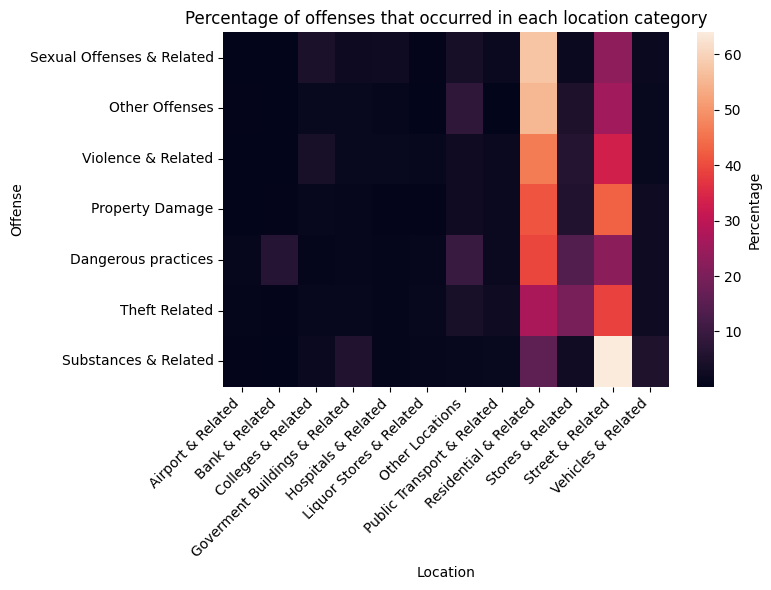

In [ ]:
#Your code here (Heatmap 1)
plt.figure(figsize=(8,6))
sns.heatmap(
    Percent_table,
    cbar_kws={'label': 'Percentage'},
)
plt.title("Percentage of offenses that occurred in each location category")
plt.xlabel("Location")
plt.ylabel("Offense")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Exercise 2

What conclusions can you make from the plot and table above?

**Answer.**

*In general, most crimes in Chicago occur in residential areas and streets. But a significant quantity of crimes related to thefts and "dangerous practices" occur in stores.*

We can also flip the script and construct the table with the proportions of crime types for each location category. Looking at both sets of proportions can give us information that was not so apparent from the contingency table itself:

![Contingency table heatmap (normalized by location)](data/images/primary_type_offenses_heatmap_by_location.png)

Offenses_cat,Dangerous practices,Other Offenses,Property Damage,Sexual Offenses & Related,Substances & Related,Theft Related,Violence & Related
Location_cat,,,,,,,
Airport & Related,20.74,4.94,2.80,0.74,4.94,51.03,14.81
Bank & Related,65.81,1.07,5.01,0.26,0.30,22.32,5.23
Colleges & Related,3.29,4.63,6.14,5.15,3.49,22.44,54.85
Goverment Buildings & Related,5.24,5.85,6.97,3.33,17.60,35.02,25.99
Hospitals & Related,6.18,6.53,4.83,6.49,4.22,31.82,39.92
Liquor Stores & Related,8.86,1.88,3.88,1.29,4.19,49.86,30.03
Other Locations,20.67,12.02,7.24,2.14,1.32,40.84,15.78
Public Transport & Related,8.29,0.68,10.26,1.91,3.08,51.28,24.50
Residential & Related,9.71,9.81,12.47,3.52,1.94,29.60,32.95


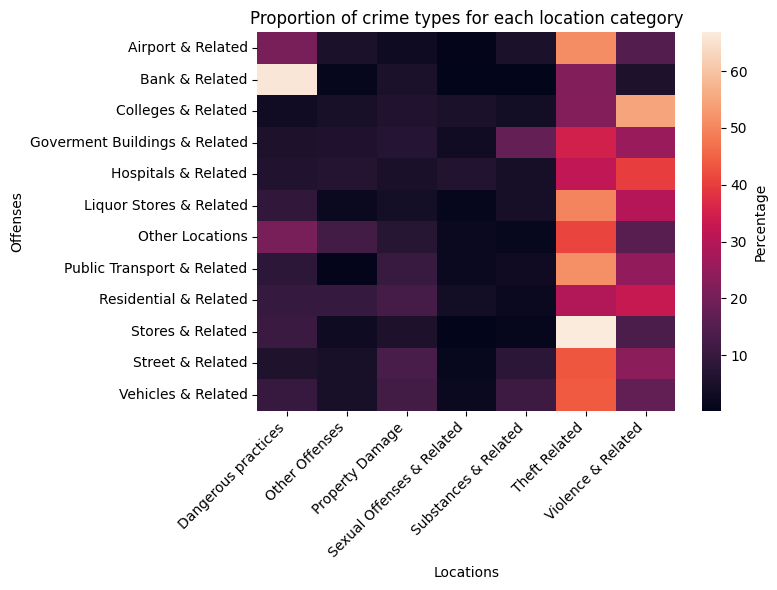

In [ ]:
#Your code here (Heatmap 2)
Percent_table=Grouped_table.div(Grouped_table.sum(axis=0), axis=1)*100
Percent_table=Percent_table.round(2)
Percent_table=Percent_table.T
display(Percent_table)

plt.figure(figsize=(8,6))
sns.heatmap(
    Percent_table,
    cbar_kws={'label': 'Percentage'},
)
plt.title("Proportion of crime types for each location category")
plt.xlabel("Locations")
plt.ylabel("Offenses")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Exercise 3

What conclusions can you make from the heat map above? Do these results still support a crime type-location type interaction?

**Answer.**

*In general, the most common crimes in each location in Chicago are related to theft and violence. However, we can see correlations between locations and offenses. For example:*
* *In stores and related, ~66% of the crimes are thefts.*
* *In banks and related, ~65% of the crimes are dangerous practices.*
* *~54% of the crimes in colleges are related to violence.*

*These proportions support a crime type-location type interaction, but it's necessary to determinate if these correlations are significant using tests.*






## Chi-squared test based on contingency tables

We have generated the contingency table of `Primary Type` vs. `Location Description` and observed that the breakdown of crime types by location type are not uniform. We concluded that there might be an interaction between these two variables. However, it is important to formally test if the variations we observed indeed reflect actual differences or if they are just a byproduct of randomness. There are many different ways to do this, but we will focus on the most widely used - the **chi-squared test** ($\chi^2$ - test). The null hypothesis for the chi-squared test is:

<br>
<center>$H_0$: `Primary Type` is independent of `Location Description`</center>
<br>

We do not need a formal definition of "independent". Intuitively, "independence between two variables" means that the distribution of values of one variable remains the same even as the value of the second variable changes (and vice versa). In our case, this would mean that the proportions of different crime types remains the same across different location types.

Let's assume for a moment that $H_0$ is true. When you have two independent events $A$ and $B$, the probability of both happening is equal to the probability of $A$ times the probability of $B$:

$$P(A \text{ and } B) = P(A)P(B)$$

Therefore, if crime type and location type are indeed independent, the proportion of cases that belong to any cell in the contingency table should be equal to the proportion of cases of the respective crime type times the proportion of cases of the respective location type. For example, we know that of all the offenses, 40.21% were thefts, and that of all the offenses, 36.56% happened in residential spaces. Therefore, under $H_0$ we would expect the proportion of all the offenses that were thefts and happened in residences to be $0.402103 \times 0.365629 = 0.1470 = 14.70\%$. Since there are 267,178 cases in our dataset, we'd expect $14.70\% \times 267,178 \approx 39,280$ cases to fall in this category.

We can repeat the same calculation for all the crime types and location types until we get a contingency table like the below:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>Dangerous practices</th>      <th>Other Offenses</th>      <th>Property Damage</th>      <th>Sexual Offenses &amp; Related</th>      <th>Substances &amp; Related</th>      <th>Theft Related</th>      <th>Violence &amp; Related</th>    </tr>    <tr>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>Airport &amp; Related</th>      <td>112</td>      <td>80</td>      <td>137</td>      <td>27</td>      <td>56</td>      <td>500</td>      <td>323</td>    </tr>    <tr>      <th>Bank &amp; Related</th>      <td>210</td>      <td>150</td>      <td>257</td>      <td>52</td>      <td>105</td>      <td>939</td>      <td>606</td>    </tr>    <tr>      <th>Colleges &amp; Related</th>      <td>502</td>      <td>359</td>      <td>615</td>      <td>124</td>      <td>251</td>      <td>2242</td>      <td>1448</td>    </tr>    <tr>      <th>Government Buildings &amp; Related</th>      <td>359</td>      <td>257</td>      <td>440</td>      <td>89</td>      <td>179</td>      <td>1603</td>      <td>1035</td>    </tr>    <tr>      <th>Hospitals &amp; Related</th>      <td>208</td>      <td>149</td>      <td>255</td>      <td>51</td>      <td>104</td>      <td>931</td>      <td>601</td>    </tr>    <tr>      <th>Liquor Stores &amp; Related</th>      <td>230</td>      <td>164</td>      <td>282</td>      <td>57</td>      <td>115</td>      <td>1027</td>      <td>663</td>    </tr>    <tr>      <th>Other Locations</th>      <td>1020</td>      <td>730</td>      <td>1250</td>      <td>253</td>      <td>510</td>      <td>4554</td>      <td>2941</td>    </tr>    <tr>      <th>Public Transport &amp; Related</th>      <td>480</td>      <td>343</td>      <td>588</td>      <td>119</td>      <td>240</td>      <td>2143</td>      <td>1384</td>    </tr>    <tr>      <th>Residential &amp; Related</th>      <td>8802</td>      <td>6302</td>      <td>10781</td>      <td>2183</td>      <td>4406</td>      <td>39280</td>      <td>25369</td>    </tr>    <tr>      <th>Stores &amp; Related</th>      <td>2865</td>      <td>2051</td>      <td>3509</td>      <td>710</td>      <td>1434</td>      <td>12787</td>      <td>8259</td>    </tr>    <tr>      <th>Street &amp; Related</th>      <td>8752</td>      <td>6266</td>      <td>10720</td>      <td>2171</td>      <td>4381</td>      <td>39057</td>      <td>25225</td>    </tr>    <tr>      <th>Vehicles &amp; Related</th>      <td>529</td>      <td>379</td>      <td>648</td>      <td>131</td>      <td>265</td>      <td>2363</td>      <td>1526</td>    </tr>  </tbody></table>

This table, remember, is *not* the actual contingency table but a conception of the *ideal* table we would like to see if `Primary Type` and `Location Description` are indeed independent.

The idea behind a $\chi^2$ - test is to quantify how much our actual contingency table deviates from this ideal one, after accounting for sampling variability. If the deviation is greater than a certain threshold, then we reject the null hypothesis and say that the variables are not independent in the population; i.e. that there does seem to be some relationship between them. We do this by computing a $p$ - value that tells us how likely it is that we observe our actual contingency table or a more extreme one if we suppose that $H_0$ is true. The smaller the $p$ - value, the less likely it is that our table is statistically the same as the ideal table.

If we conduct a $\chi^2$-test on our contingency table, we will find that the $p$ - value is extremely small - essentially zero. We can thus reject the null hypothesis and conclude that `Primary Type` and `Location Description` are not independent.

In [ ]:
Grouped_table_T=Grouped_table.T
display(Grouped_table_T)

chi2,p_val,_,_=chi2_contingency(Grouped_table_T)

print("Chi-squared statistic:", chi2)
print("P-value:", p_val)

Offenses_cat,Dangerous practices,Other Offenses,Property Damage,Sexual Offenses & Related,Substances & Related,Theft Related,Violence & Related
Location_cat,,,,,,,
Airport & Related,252,60,34,9,60,620,180
Bank & Related,1536,25,117,6,7,521,122
Colleges & Related,179,252,334,280,190,1221,2984
Goverment Buildings & Related,206,230,274,131,692,1377,1022
Hospitals & Related,142,150,111,149,97,731,917
Liquor Stores & Related,226,48,99,33,107,1272,766
Other Locations,2331,1355,816,241,149,4605,1780
Public Transport & Related,439,36,543,101,163,2714,1297
Residential & Related,9460,9555,12147,3429,1889,28834,32103


Chi-squared statistic: 43501.239933423676
P-value: 0.0


### Exercise 4

Our client is interested in violent crimes around residential areas. In order to gather some information, you talk to a police officer who tells you the following:

> From my experience, violent crime offenses do not discriminate by location around residential areas. I have seen everything happen, everywhere.

If you wanted to use a $\chi^2$-test, what would be the null and the alternative hypotheses? What would a $p$-value of 0 mean?

**Hint:** Remember that violent crime and residential areas are groups of categories of `Primary Type` and `Location Description`, respectively (see Exercise 1).

**Answer.**

* *Null hypothesis: Violent crime types are independent from the location around residential areas.*
* *Alternative hypothesis: Violent crime types are correlated with locations in residential areas.*

*A p-value of 0 means that both columns have a strong interaction and the null hypothesis is false.*

## $\chi^2$ -square test for primary type vs. day of the week

Sometimes when we perform the chi-square test, one of the variables (or even both of them) is not naturally categorical (for example, time). However, we can *discretize* such variables and perform the chi-squared test on the discretized versions. We will now discretize the time variable into day-of-the-week buckets and test if the day of the week is independent of crime types. This test will tell us if we should vary police force deployment by day of the week.

Below is the contingency table heat map, normalized by day of the week (so that the proportions for each day sum to 100%):

![](data/images/day_type_heatmap.png)

In [ ]:
#Contingency table
df["Date"] = pd.to_datetime(df["Date"])
df["DayOfWeek"] = df["Date"].dt.day_name()

cat_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df["DayOfWeek"] = pd.Categorical(df["DayOfWeek"], categories=cat_order, ordered=True)

dayofweek_table= pd.crosstab(df["DayOfWeek"],df["Offenses_cat"])
display(dayofweek_table)

dayofweek_table_p=dayofweek_table.div(dayofweek_table.sum(axis=1), axis=0)*100
dayofweek_table_p=dayofweek_table_p.round(2)
display(dayofweek_table_p)

/tmp/ipython-input-2463463714.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


Offenses_cat,Dangerous practices,Other Offenses,Property Damage,Sexual Offenses & Related,Substances & Related,Theft Related,Violence & Related
DayOfWeek,,,,,,,
Monday,3627,2486,4233,705,1656,15463,9696
Tuesday,3565,2586,4046,830,1645,15207,9451
Wednesday,3505,2554,3891,829,1711,15251,9414
Thursday,3561,2459,3945,793,1799,15411,9330
Friday,3887,2568,4128,864,2080,16524,9662
Saturday,3248,2273,4551,866,1667,15341,10361
Sunday,2681,2311,4693,1086,1494,14236,11473


Offenses_cat,Dangerous practices,Other Offenses,Property Damage,Sexual Offenses & Related,Substances & Related,Theft Related,Violence & Related
DayOfWeek,,,,,,,
Monday,9.58,6.57,11.18,1.86,4.37,40.84,25.61
Tuesday,9.55,6.93,10.84,2.22,4.41,40.74,25.32
Wednesday,9.43,6.87,10.47,2.23,4.61,41.05,25.34
Thursday,9.55,6.59,10.58,2.13,4.82,41.32,25.01
Friday,9.79,6.47,10.39,2.18,5.24,41.61,24.33
Saturday,8.48,5.93,11.88,2.26,4.35,40.05,27.05
Sunday,7.06,6.09,12.36,2.86,3.93,37.49,30.21


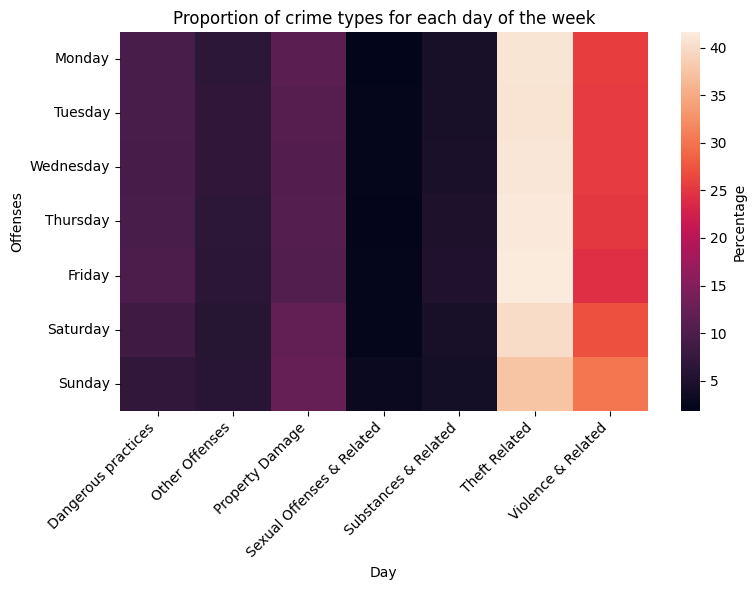

In [ ]:
#Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    dayofweek_table_p,
    cbar_kws={'label': 'Percentage'},
)
plt.title("Proportion of crime types for each day of the week")
plt.xlabel("Day")
plt.ylabel("Offenses")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Exercise 5

Just from looking at the heat map, do you think the null hypothesis would be rejected or not in a $\chi^2$-test?

**Answer.**

*I think the hypothesis would be rejected because I can see a little relation between the days of the week and some crime types. For example, crimes related to violence are more common during weekends.*

## Conclusions

In this case, we performed the chi-squared test to validate various patterns and relationships that we observed between various features in the Chicago crime incidents dataset. This test provided statistical evidence that the patterns we saw in the contingency tables were not just due to chance. This provides strong backing for the police department to take the big step of reorganizing their force in line with our observations.

## Takeaways

In this case, we've learned another method to statistically validate the patterns we observe from exploratory data analysis. More specifically, we have:

1. Learned how contingency tables are useful for detecting patterns across categorical variables. In particular, we have seen that taking proportions and using heat maps is useful to better understand the results of a contingency table.
2. Learned how to perform chi-squared tests to examine if two categorical variables are independent. This test, along with the $t$ - test, is one the pillars of statistical hypothesis testing. You will use these tests very often when analyzing data.
3. Finally, we have learned how to deal with continuous variables such as time when using the chi-squared test. This is done by creating artificial (but meaningful) categories which allow us to implement the test in these instances as well.

## Attribution

"Crimes - 2001 to Present", March 5, 2021, Chicago Police Department, dataset licensed under the City of Chicago [Terms of Use](https://www.chicago.gov/city/en/narr/foia/data_disclaimer.html), https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2